In [4]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib.ticker as ticker, statsmodels.formula.api as smf
sns.set(style="darkgrid", font_scale=1.5)

data = pd.read_csv("vaxUpdate.csv", parse_dates=["date"])
data["date"] = data["date"] - pd.Timedelta(days=1)
data["dayofyear"] = data["date"].dt.dayofyear

data.at[277, "act"] = (data.at[279, "act"] - data.at[276, "act"]) / 3 + data.at[276, "act"]
data.at[277, "aus"] = (data.at[279, "aus"] - data.at[276, "aus"]) / 3 + data.at[276, "aus"]
data.at[278, "act"] = (data.at[279, "act"] - data.at[276, "act"]) / 3 * 2 + data.at[276, "act"]
data.at[278, "aus"] = (data.at[279, "aus"] - data.at[276, "aus"]) / 3 * 2 + data.at[276, "aus"]

data["aus_pc"] = data.aus / (25739256 - 325331 - 326764 - 1520922 - 1635966)
data["act_pc"] = data.act / (432266 - 5593 - 5571 - 27121 - 29043)

for i in data.index:
    if data.at[i, "date"] < pd.Timestamp("2021-07-28"):
        data.at[i, "act_pc"] = data.at[i, "aus_pc"] * 1.2
        
data

,date,act,aus,dayofyear,aus_pc,act_pc
0,2021-03-22,NaN,5.075000e+03,81,0.000231,0.000278
1,2021-03-23,NaN,6.269000e+03,82,0.000286,0.000343
2,2021-03-24,NaN,1.046300e+04,83,0.000477,0.000573
3,2021-03-25,NaN,1.367300e+04,84,0.000623,0.000748
4,2021-03-26,NaN,1.550600e+04,85,0.000707,0.000848
...,...,...,...,...,...,...
276,2021-12-23,361202.000000,1.967861e+07,357,0.897326,0.989763
277,2021-12-24,361220.333333,1.968561e+07,358,0.897646,0.989813
278,2021-12-25,361238.666667,1.969262e+07,359,0.897965,0.989863
279,2021-12-26,361257.000000,1.969962e+07,360,0.898284,0.989913


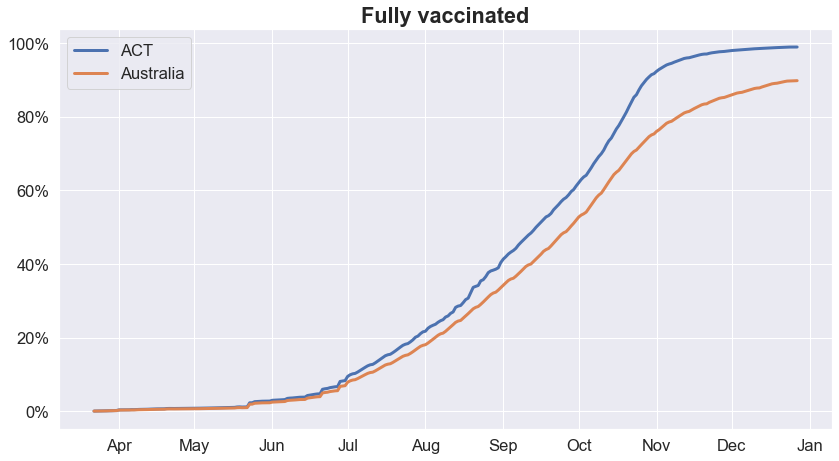

In [5]:
fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)

sns.lineplot(data=data, x="date", y="act_pc", ax=ax, label="ACT", lw=3)
sns.lineplot(data=data, x="date", y="aus_pc", ax=ax, label="Australia", lw=3)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Fully vaccinated", fontsize="large", fontweight="bold")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))